# 1.1 Example: Polynomial Curve Fitting

Polynomial regression of synthetic data (sine wave + Gaussian noise).

Data obtained from http://research.microsoft.com/en-us/um/people/cmbishop/PRML/webdatasets/curvefitting.txt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

## Load data

In [2]:
data = np.loadtxt('../data/curvefitting.txt', dtype=str, delimiter=' ')

In [3]:
data = data.astype(np.float64)

In [4]:
x = data[:, 0]
t = data[:, 1]

In [5]:
# for plotting the sinusoid
x_grid = np.linspace(0, 1, 100)
t_grid = np.sin(2 * np.pi * x_grid)

In [6]:
# generate test data
N_test = 100  # number of test points
sigma = 0.3
x_test = np.random.rand(N_test)
t_test = np.sin(2 * np.pi * x_test) + sigma * np.random.randn(N_test)

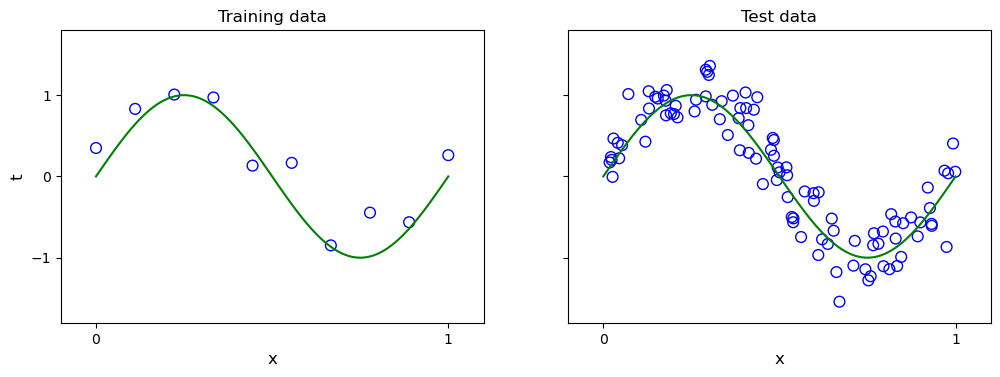

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 3.8), sharey=True)
ax[0].plot(x_grid, t_grid, 'g')  # ground truth sinusoid
ax[0].scatter(x, t, facecolors='none', edgecolors='b', s=60)
ax[0].set_xlim([-0.1, 1.1])
ax[0].set_ylim([-1.8, 1.8])
ax[0].set_xticks(ticks=[0, 1])
ax[0].set_yticks(ticks=[-1, 0, 1])
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_ylabel('t', fontsize=12)
ax[0].set_title('Training data')

ax[1].plot(x_grid, t_grid, 'g')  # ground truth sinusoid
ax[1].scatter(x_test, t_test, facecolors='none', edgecolors='b', s=60)
ax[1].set_xlim([-0.1, 1.1])
ax[1].set_xticks(ticks=[0, 1])
ax[1].set_xlabel('x', fontsize=12)
ax[1].set_title('Test data')
plt.show()

## Polynomial curve fitting

In [8]:
def poly_fit_ridge(x, t, x_test, t_test, M, ln_lambda):
    """
    Args:
        x (np.array): inputs
        t (np.array): target values
        x_test (np.array): input values for test data
        t_test (np.array): target values for test data
        M (int): degree of the polynomial
        ln_lambda (float): log (regularization parameter)
        
    Returns:
        RMS_train (float64): RMS error for training data
        RMS_test  (float64): RMS error for test data
    """
    poly = PolynomialFeatures(degree=M, include_bias=True)
    X = poly.fit_transform(x.reshape(-1, 1))
    
    alpha = np.exp(ln_lambda)
    model = Ridge(alpha, fit_intercept=False)
    model.fit(X, t)
    t_pred = model.predict(X)
    RMS_train = RMS(t_pred, t)
    
    X_test = poly.fit_transform(x_test.reshape(-1, 1))
    t_test_pred = model.predict(X_test)
    RMS_test = RMS(t_test_pred, t_test)
    
    return RMS_train, RMS_test

In [9]:
def RMS(t_pred, t):
    return np.sqrt(np.mean(((t_pred - t) ** 2)))

In [10]:
ln_lambda_list = np.linspace(-40, 5, 50)

RMS_train_list = []
RMS_test_list = []

for ln_lambda in ln_lambda_list:
    RMS_train, RMS_test = poly_fit_ridge(x, t, x_test, t_test, M=9, ln_lambda=ln_lambda)
    RMS_train_list.append(RMS_train)
    RMS_test_list.append(RMS_test)

E_train = np.array(RMS_train_list)
E_test = np.array(RMS_test_list)

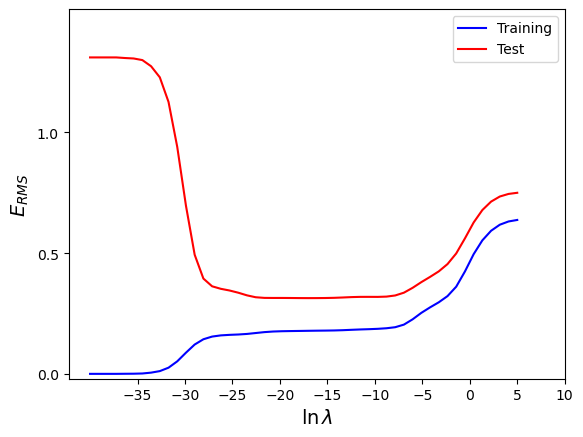

In [11]:
plt.plot(ln_lambda_list, E_train, 'b-', markerfacecolor='none', ms=10, label='Training')
plt.plot(ln_lambda_list, E_test, 'r-', markerfacecolor='none', ms=10, label='Test')
plt.ylim(-0.02, E_test.max() + 0.2)
plt.legend()
plt.xticks(ticks=np.arange(-35, 15, 5))
plt.yticks(ticks=[0, 0.5, 1])
plt.xlabel(r'$\ln \lambda$', fontsize=14)
plt.ylabel(r'$E_{RMS}$', fontsize=14)
plt.show()